In [1]:
import keras

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)


Jak widać, zbiór treningowy składa się z 404 próbek, a zbiór testowy ze 102 próbek. Każda próbka jest opisana za pomocą 13 cech numerycznych:

1. Współczynnik przestępczości 
2. Część działek o powierzchni przekraczającej 2300 metrów kwadratowych.
3. Część powierzchni działek działalności gospodarczych nie zajmujących się sprzedażą.
4. Sztuczna zmienna rzeki Charles River (= 1 jeżeli działka znajduje się przy rzece; 0 w pozostałych przypadkach).
5. Stopień koncentracji tlenków azotu(cząstek na 10 milionów).
6. Średnia liczba pokoi w budynku.
7. Część mieszkań zajętych przez właścicieli, które zostały wybudowane przed rokiem 1940.
8. Średnia ważona odległości od pięciu stref, w których znajduje się najwięcej zakładów pracy.
9. Indeks dostępności dróg szybkiego ruchu
10. Pełny podatek od nieruchomości za 10000 $.
11. Stosunek liczby uczniów do liczby nauczycieli.
12. 1000 * (Bk - 0.63) ** 2, gdzie Bk ułamkiem czarnoskórej ludności miasta.
13. % niższego statusu populacji.

Celem jest określenie median wartości domów zamieszkanych przez właścicieli — wyrażonych w tysiącach dolarów:

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Przygotowywanie danych


Ładowanie do sieci neuronowej wartości należących do kilku różnych zakresów może sprawić problem. Niektóre sieci są w stanie automatycznie dopasować do siebie tak różne dane, ale z pewnością utrudni to proces uczenia. Najlepszą praktyką podczas pracy z takimi danymi jest przeprowadzenie normalizacji poszczególnych cech: w przypadku każdej cechy danych wejściowych (kolumny macierzy danych wejściowych) należy przeprowadzić operację odejmowania od wartości średniej i dzielenia przez odchylenie standardowe — wówczas wartości cech zostaną wyśrodkowane wokół zera i będą charakteryzowały się jednostkowym odchyleniem standardowym. Operację tę można z łatwością przeprowadzić dzięki bibliotece Numpy.

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Budowanie sieci


Dysponujemy małą liczbą próbek, a więc zbudujemy bardzo małą sieć zawierającą dwie warstwy ukryte, składające się z 64 jednostek każda. Ogólnie rzecz biorąc, im mniejszą ilością danych treningowych dysponujemy, tym bardziej jesteśmy narażeni na nadmierne dopasowanie sieci. W celu zminimalizowania efektu nadmiernego dopasowania można między innymi korzystać z małej sieci.

In [7]:
from keras import models
from keras import layers

def build_model():
    # Będziemy tworzyć wiele instancji tego samego modelu, 
    # a więc konstruując je, będziemy korzystać z funkcji.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


Sieć kończy się pojedynczą jednostką bez funkcji aktywacji (jest to warstwa liniowa). To typowe rozwiązanie stosowane w regresji skalarnej (regresji, w której próbuje się przewidzieć jedną wartość o charakterze ciągłym). Zastosowanie funkcji aktywacji ograniczyłoby zakres wartości wyjściowych możliwych do wygenerowania. Gdybyśmy zastosowali w ostatniej warstwie tej sieci funkcję aktywacji sigmoid, to sieć mogłaby generować tylko wartości znajdujące się w zakresie od 0 do 1. W praktyce zastosowaliśmy ostatnią warstwę o charakterze liniowym, a więc możemy przewidywać dowolne wartości.

Zwróć uwagę na to, że sieć jest kompilowana z funkcją straty mse (średniego błędu kwadratowego). Funkcja ta oblicza kwadrat różnicy między wartościami przewidywanymi przez sieć i wartościami docelowymi. Ta funkcja straty jest często używana w czasie rozwiązywania problemów regresji.

Podczas trenowania monitorowana jest nowa metryka: średni błąd bezwzględny (mae). Jest to bezwzględna wartość różnicy między wartościami przewidywanymi przez sieć a wartościami docelowymi. Średnia wartość błędu bezwzględnego o wartości równej np. 0,5 w przypadku tego problemu oznacza, że przewidywane ceny średnio odbiegają od wartości docelowych o 500 dolarów.

## K-składowa walidacja krzyżowa


W celu oceny sprawności działania sieci podczas dostrajania jej parametrów, takich jak liczba epok trenowania, możemy tak jak wcześniej podzielić dane treningowe na podzbiór treningowy i podzbiór walidacyjny, ale nasz zbiór jest na tyle mały, że podzbiór walidacyjny utworzony w ten sposób byłby bardzo mały (zawierałby np. tylko 100 elementów). W związku z tym wynik walidacji mógłby ulegać dużej zmianie w zależności od tego, które elementy treningowego zbioru danych byłyby używane podczas walidacji, a które podczas trenowania. Wyniki walidacji mogłyby charakteryzować się dużą wariancją zależną od podziału zbioru testowego na podzbiór testowy i walidacyjny. W takiej sytuacji nie można przeprowadzić wiarygodnej walidacji.

Wówczas najlepiej jest skorzystać z walidacji krzyżowej k-składowych. Polega ona na podziale dostępnych danych na k części (zwykle 4 lub 5), utworzeniu k identycznych modeli i trenowaniu każdego z nich na k – 1 częściach zbioru i przeprowadzaniu ewaluacji na pozostałej, nieużytej wcześniej części zbioru dostępnych danych. Wynik walidacji modelu jest średnią wyników walidacji wszystkich składowych modeli.

Kod implementujący to rozwiązanie jest dość prosty:

In [8]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Przygotuj dane walidacyjne: dane z k-tej składowej.
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Przygotuj dane treningowe: dane z pozostałych składowych.
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Zbuduj model Keras (model został skompilowany wcześniej).
    model = build_model()
    # Trenuj model w trybie cichym (parametr verbose = 0).
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Przeprowadź ewaluację modelu przy użyciu danych walidacyjnych.
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [9]:
all_scores

[2.1408419609069824, 2.402707576751709, 2.776521921157837, 2.5676326751708984]

In [10]:
np.mean(all_scores)

2.4719260334968567


Podczas poszczególnych iteracji uzyskujemy dość zróżnicowane wartości walidacji (od 2,6 do 3,2). Średnia wartość (3,0) jest wartością, na której można o wiele bardziej polegać niż na poszczególnych wynikach walidacji składowych — właśnie to chcieliśmy uzyskać, stosując k-składową walidację krzyżową. W tym przypadku odchodzimy od wartości docelowych średnio o 3000 dolarów, co jest znaczącą kwotą przy cenach znajdujących się w zakresie od 10 000 do 50 000 dolarów.

Spróbujmy wydłużyć proces trenowania do 500 epok. W celu obserwacji wydajności modelu w każdej epoce zmodyfikujemy pętlę treningową tak, aby zapisywała wynik walidacji poszczególnych epok w dzienniku pracy.


In [11]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [14]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Przygotowuje dane walidacyjne: dane z k-tej składowej.
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Przygotowuje dane treningowe: dane z pozostałych składowych.
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Buduje model Keras (model został skompilowany wcześniej).
    model = build_model()
    # Przeprowadza ewaluację modelu przy użyciu danych walidacyjnych.
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Teraz możemy obliczyć średni wynik walidacji wszystkich składowych poszczególnych epok:

In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Przedstawmy średni błąd bezwzględny na wykresie:

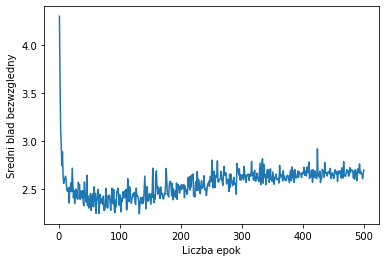

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Liczba epok')
plt.ylabel('Sredni blad bezwzgledny')
plt.show()


ykres może okazać się dość trudny do przeanalizowania z powodu skali i dużej wariancji. Przeprowadźmy następujące operacje:

* Pomińmy 10 pierwszych punktów wykresu (wymagają one zastosowania innej skali niż reszta krzywej).
* Zastąpmy każdy punkt wykresu ruchomą średnią wykładniczą poprzednich punktów (spowoduje to wyrównanie przebiegu krzywej).

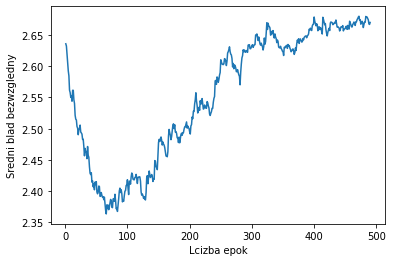

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Lcizba epok')
plt.ylabel('Sredni blad bezwzgledny')
plt.show()


Z ostatniego wykresu wynika, że średni błąd bezwzględny przestaje ulegać poprawie po 80 epokach. Po przekroczeniu tego punktu model zaczyna ulegać przeuczeniu.

Po zakończeniu dostrajania pozostałych parametrów modelu (poza liczbą epok możemy zmienić również rozmiar warstw ukrytych) przeprowadzamy trenowanie ostatecznej wersji modelu na całym zbiorze danych treningowych (w procesie tym korzystamy z optymalnych parametrów), a następnie sprawdzamy jego wydajność na zbiorze testowym.


In [18]:
# Utwórz nową, skompilowaną wersję modelu.
model = build_model()
# Trenuj model na całym zbiorze danych treningowych.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.8426 - mae: 2.5699


In [19]:
test_mae_score

2.5699408054351807

Przewidywane ceny wciąż odbiegają od rzeczywistych średnio o 2550 $.